In [17]:
import gym
import math
import torch
import random
import gym_nav2d
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

env = gym.make('nav2d-v0')
print('number of discrete actions:', len(env.action_space))
print('dimension of observation space:', len(env.observation_space))

number of discrete actions: 2
dimension of observation space: 5


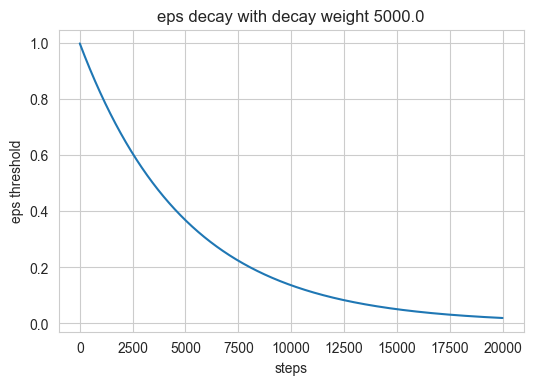

In [18]:
# epsilon exploration
EPS_START = 0.999
EPS_END = 0.001
EPS_DECAY = 5e3
TARGET_UPDATE = 20
num_episodes = 5000
eps_plot = []

for steps_done in range(20000):
    eps_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * steps_done / EPS_DECAY)
    eps_plot.append(eps_threshold)

plt.figure(dpi=100)
plt.plot(eps_plot)
plt.title('eps decay with decay weight {}'.format(EPS_DECAY))
plt.xlabel('steps')
plt.ylabel('eps threshold')
plt.show()

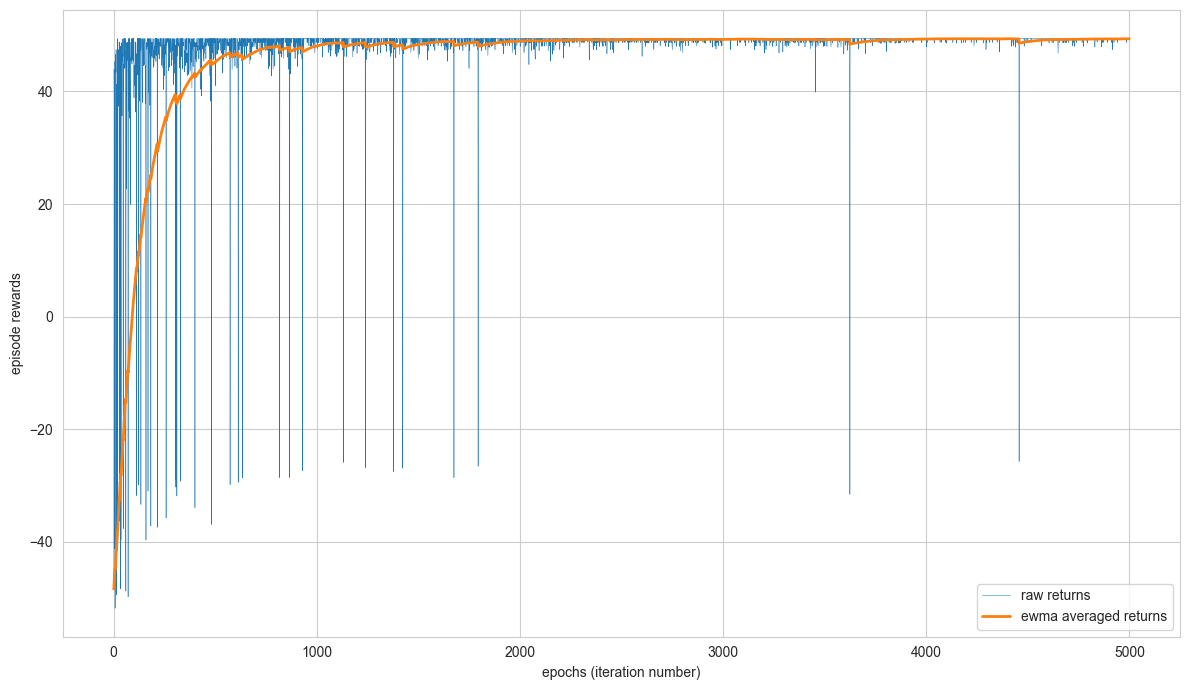

In [28]:
# plot learning rewards
def ewma_average(rewards, alpha):
    """
    Exponentially weighted moving average for smooth reward-plotting.
    Inputs: rewards: 1-dim rewards data to plot; alpha: discount factor.
    S_t = y_t, t = 0
    S_t = alpha * S_(t - 1) + (1 - alpha) * y_t, t > 0
    """
    s = np.zeros(len(rewards))
    for t in range(0, len(rewards)):
        if t == 0:
            s[t] = rewards[t]
        else:
            s[t] = alpha * s[t - 1] + (1 - alpha) * rewards[t]
    return s

logger_path = './logs/logger.txt'
logs = np.loadtxt(logger_path, dtype=np.float32, delimiter=',')
logs = logs[:5000]
raw_rewards = logs[:, 1]
averaged_rewards = ewma_average(raw_rewards, 0.99)

sb.set_style('whitegrid')
plt.figure(dpi=100, figsize=(12, 7))
plt.plot(raw_rewards, label='raw returns', linewidth=0.36)
plt.plot(averaged_rewards, label='ewma averaged returns', linewidth=2)
plt.xlabel("epochs (iteration number)")
plt.ylabel("episode rewards")
plt.legend()
plt.tight_layout()
plt.savefig('./figures/learning_curve_reward.png')

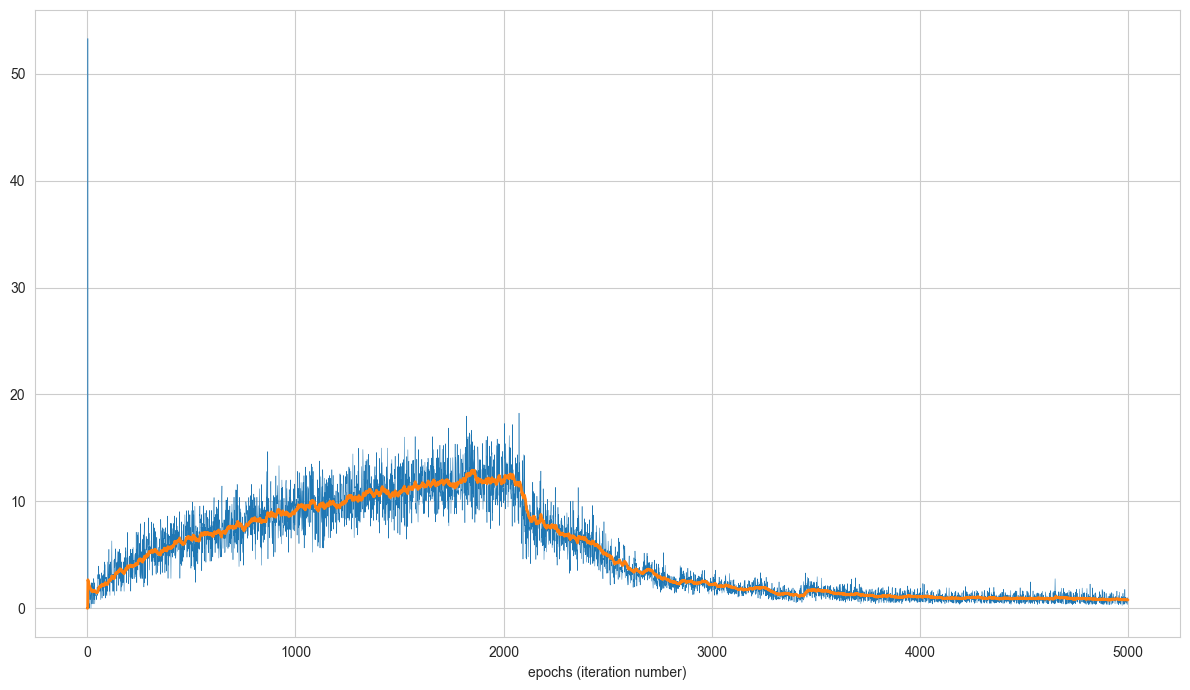

In [29]:
raw_rewards = logs[:, 2]
averaged_rewards = ewma_average(raw_rewards, 0.95)

sb.set_style('whitegrid')
plt.figure(dpi=100, figsize=(12, 7))
plt.plot(raw_rewards, label='raw returns', linewidth=0.36)
plt.plot(averaged_rewards, label='ewma averaged returns', linewidth=2)
plt.xlabel("epochs (iteration number)")
#plt.ylabel("episode rewards")
#plt.legend()
plt.tight_layout()
plt.savefig('./figures/learning_curve_reward.png')

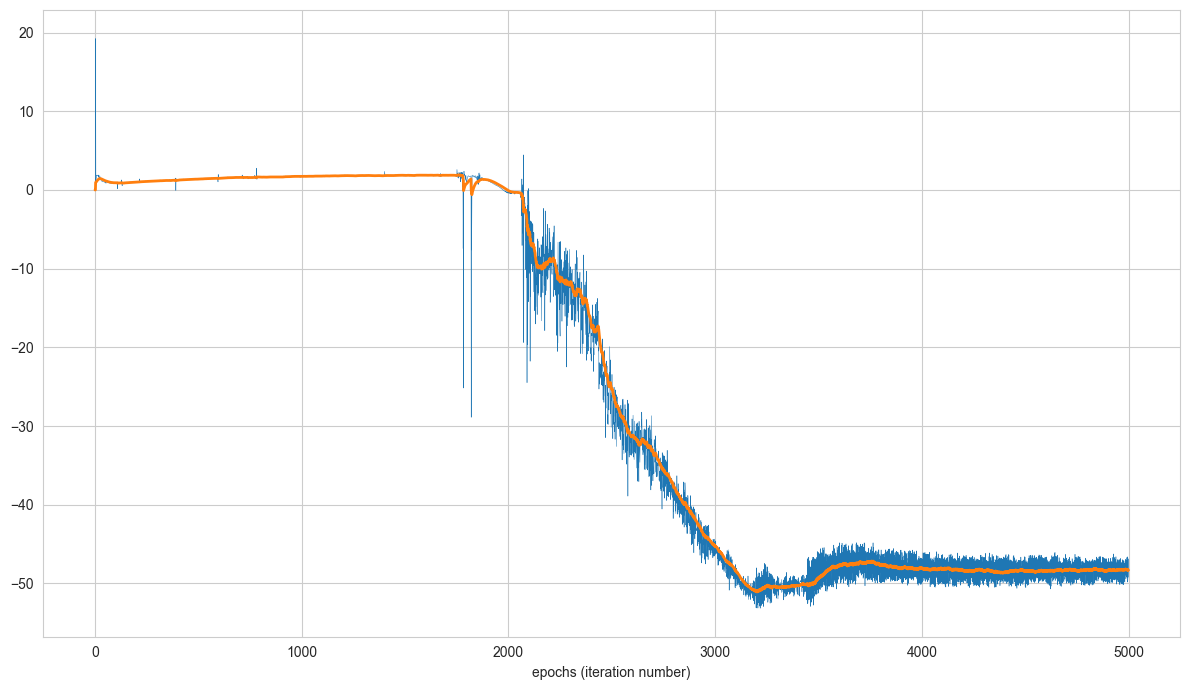

In [30]:
raw_rewards = logs[:, 3]
averaged_rewards = ewma_average(raw_rewards, 0.95)

sb.set_style('whitegrid')
plt.figure(dpi=100, figsize=(12, 7))
plt.plot(raw_rewards, label='raw returns', linewidth=0.36)
plt.plot(averaged_rewards, label='ewma averaged returns', linewidth=2)
plt.xlabel("epochs (iteration number)")
#plt.ylabel("episode rewards")
#plt.legend()
plt.tight_layout()
plt.savefig('./figures/learning_curve_reward.png')